[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


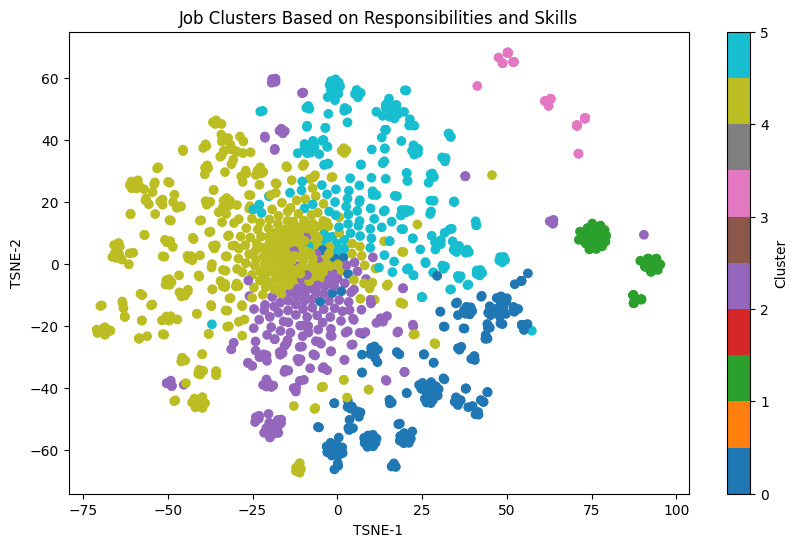


 Cluster 0 Sample Job Titles:
['Google Cloud Program Manager'
 'Strategic Technology Partner Manager, Healthcare and Life Sciences'
 'Solutions Architect, Healthcare and Life Sciences, Google Cloud'
 'Partner Onboarding Manager (Americas)'
 'Machine Learning Product Specialist, Google Cloud (EMEA)']

 Cluster 1 Sample Job Titles:
['BOLD Intern, Summer 2018' 'MBA Intern, Summer 2018'
 'BOLD Intern, Summer 2018' 'MBA Intern, Summer 2018'
 'MBA Intern, Summer 2018']

 Cluster 2 Sample Job Titles:
['Associate Account Strategist (Czech/Slovak), Global Customer Experience'
 'Associate Account Strategist (Ukrainian), GMS Sales'
 'Measurement Solutions Consultant, Google Technical Services'
 'Measurement and Attribution Specialist (Northern Europe)'
 'Associate Account Strategist (Hungarian), Global Customer Experience']

 Cluster 3 Sample Job Titles:
['Business Intern 2018' 'Business Intern 2018' 'Business Intern 2018'
 'Business Intern 2018' 'Business Intern 2018']

 Cluster 4 Sample Job Ti

In [11]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download('stopwords')
df = pd.read_csv('job_skills.csv')
df.head()

df['combined_text'] = df[['Responsibilities', 'Minimum Qualifications', 'Preferred Qualifications']].fillna('').agg(' '.join, axis=1)

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['combined_text'].apply(clean_text)


vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])


num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['cluster'], cmap='tab10')
plt.title('Job Clusters Based on Responsibilities and Skills')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.colorbar(label='Cluster')
plt.show()

for i in range(num_clusters):
    print(f"\n Cluster {i} Sample Job Titles:")
    print(df[df['cluster'] == i]['Title'].head(5).values)

from collections import Counter

for i in range(num_clusters):
    print(f"\n Cluster {i} Top Words:")
    cluster_texts = " ".join(df[df['cluster'] == i]['cleaned_text'])
    common_words = Counter(cluster_texts.split()).most_common(10)
    print(common_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


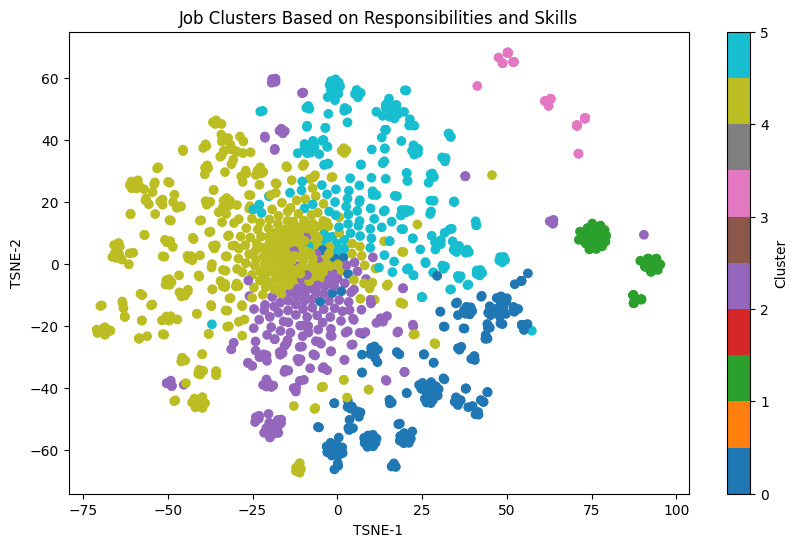


Cluster 0 Sample Titles:
['Google Cloud Program Manager'
 'Strategic Technology Partner Manager, Healthcare and Life Sciences'
 'Solutions Architect, Healthcare and Life Sciences, Google Cloud'
 'Partner Onboarding Manager (Americas)'
 'Machine Learning Product Specialist, Google Cloud (EMEA)']

Cluster 1 Sample Titles:
['BOLD Intern, Summer 2018' 'MBA Intern, Summer 2018'
 'BOLD Intern, Summer 2018' 'MBA Intern, Summer 2018'
 'MBA Intern, Summer 2018']

Cluster 2 Sample Titles:
['Associate Account Strategist (Czech/Slovak), Global Customer Experience'
 'Associate Account Strategist (Ukrainian), GMS Sales'
 'Measurement Solutions Consultant, Google Technical Services'
 'Measurement and Attribution Specialist (Northern Europe)'
 'Associate Account Strategist (Hungarian), Global Customer Experience']

Cluster 3 Sample Titles:
['Business Intern 2018' 'Business Intern 2018' 'Business Intern 2018'
 'Business Intern 2018' 'Business Intern 2018']

Cluster 4 Sample Titles:
['Supplier Developm

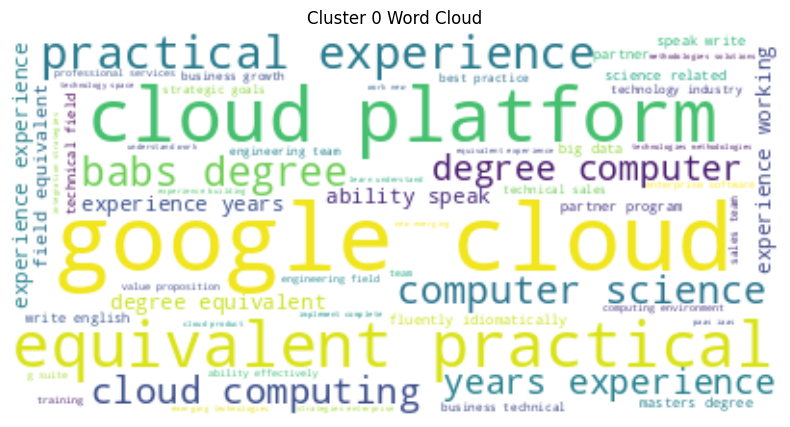

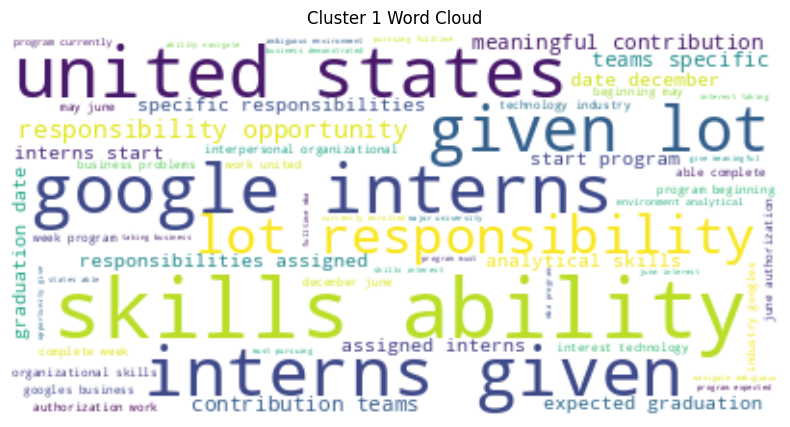

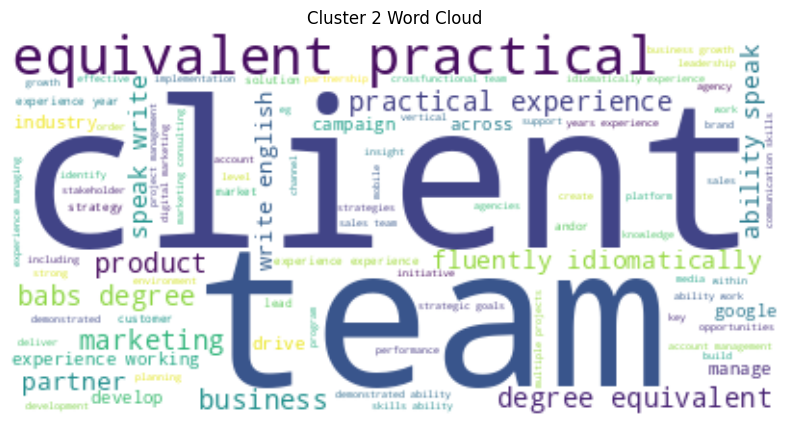

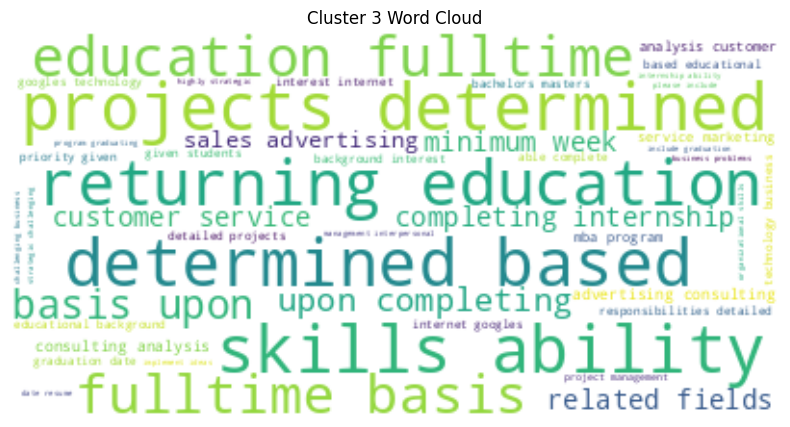

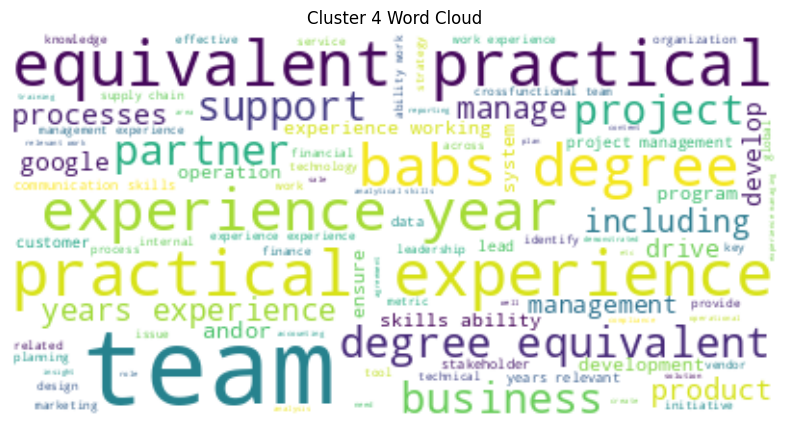

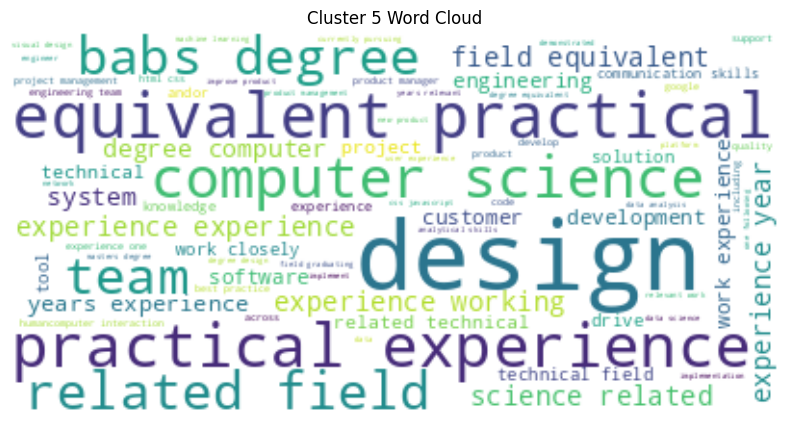

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from google.colab import files
import pandas as pd
import re
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

df = pd.read_csv('job_skills.csv')
df.head()

df['combined_text'] = df[['Responsibilities', 'Minimum Qualifications', 'Preferred Qualifications']].fillna('').agg(' '.join, axis=1)

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['combined_text'].apply(clean_text)


vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])


num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['cluster'], cmap='tab10')
plt.title('Job Clusters Based on Responsibilities and Skills')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.colorbar(label='Cluster')
plt.show()

for i in range(num_clusters):
    print(f"\nCluster {i} Sample Titles:")
    print(df[df['cluster'] == i]['Title'].head(5).values)


for i in range(num_clusters):
    print(f"\n🔸 Cluster {i} Common Skills/Keywords:")
    text = " ".join(df[df['cluster'] == i]['cleaned_text'])
    keywords = Counter(text.split()).most_common(10)
    print(keywords)


for i in range(num_clusters):
    text = " ".join(df[df['cluster'] == i]['cleaned_text'])
    wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {i} Word Cloud")
    plt.show()

df.to_csv("clustered_jobs.csv", index=False)
files.download("clustered_jobs.csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


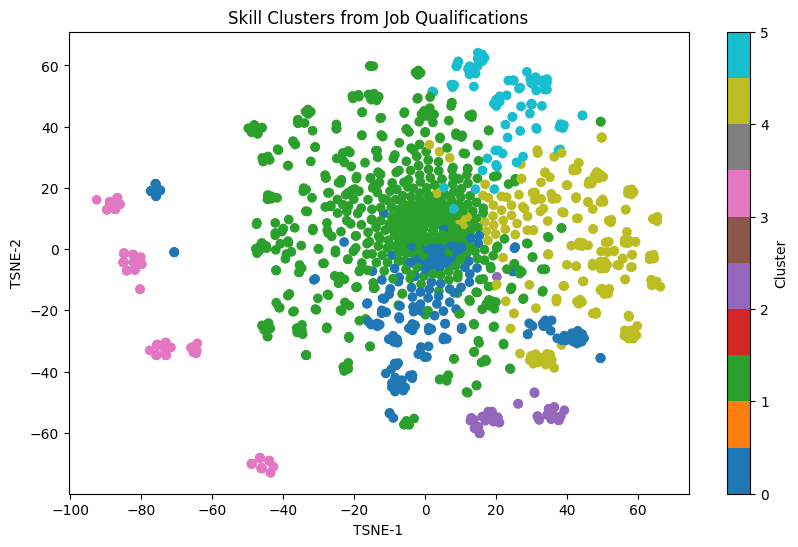


Cluster 0 - Sample Job Titles:
['Associate Account Strategist (Czech/Slovak), Global Customer Experience'
 'Associate Account Strategist (Ukrainian), GMS Sales'
 'Measurement and Attribution Specialist (Northern Europe)'
 'Associate Account Strategist (Hungarian), Global Customer Experience'
 'Product Strategy and Operations Lead, Consumer Payments (English, Russian)']

Cluster 0 - Common Skills/Keywords:
[('experience', 645), ('ability', 454), ('skills', 200), ('sales', 188), ('degree', 176), ('management', 174), ('speak', 172), ('english', 169), ('fluently', 169), ('idiomatically', 168)]

Cluster 1 - Sample Job Titles:
['Supplier Development Engineer (SDE), Cable/Connector'
 'Data Analyst, Product and Tools Operations, Google Technical Services'
 'Program Manager, Audio Visual (AV) Deployments'
 'Supplier Development Engineer, Camera, Consumer Hardware'
 'Manufacturing Business Manager, Google Hardware']

Cluster 1 - Common Skills/Keywords:
[('experience', 2619), ('ability', 1023), 

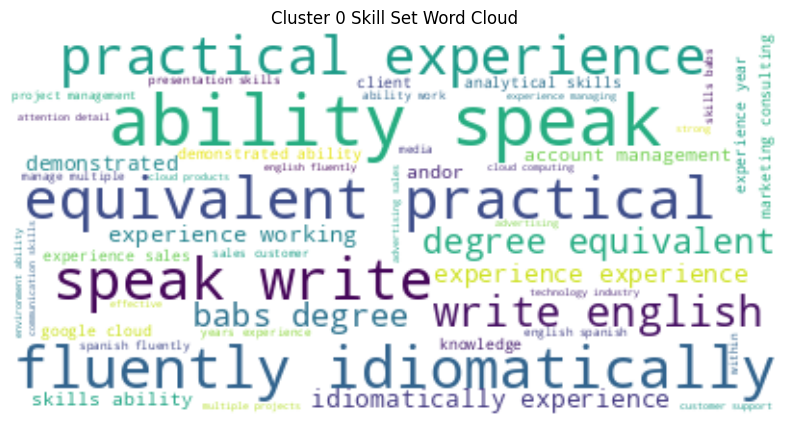

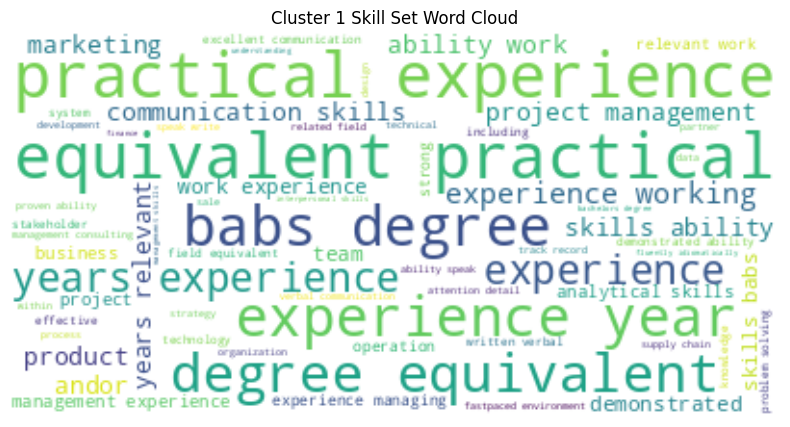

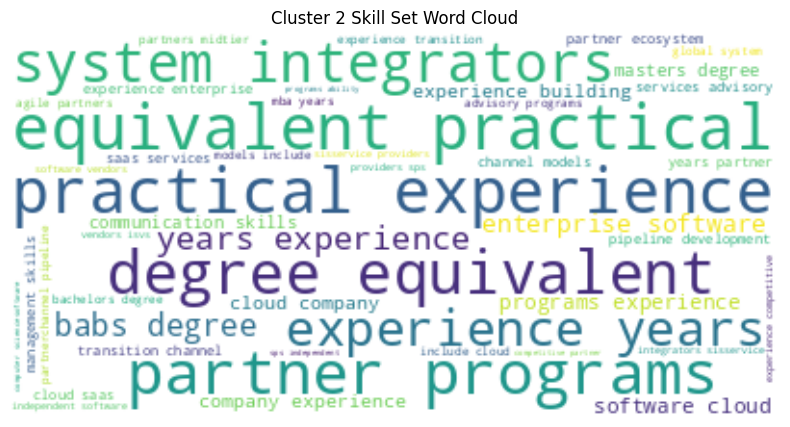

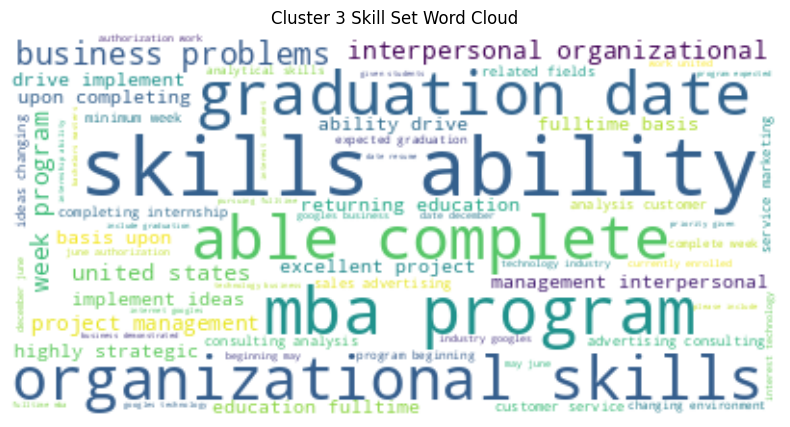

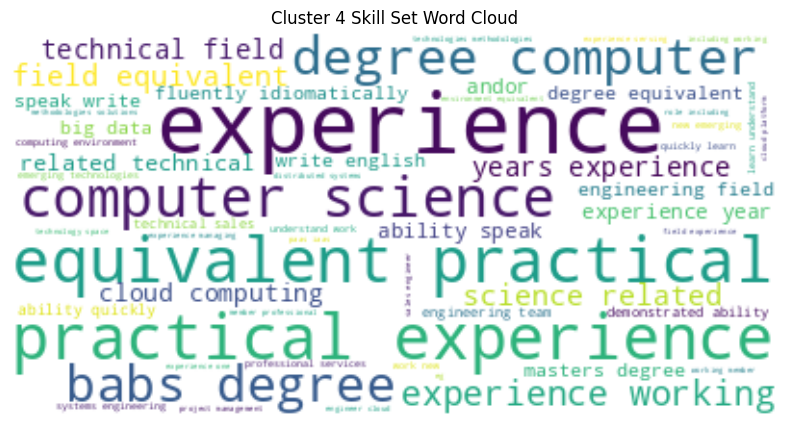

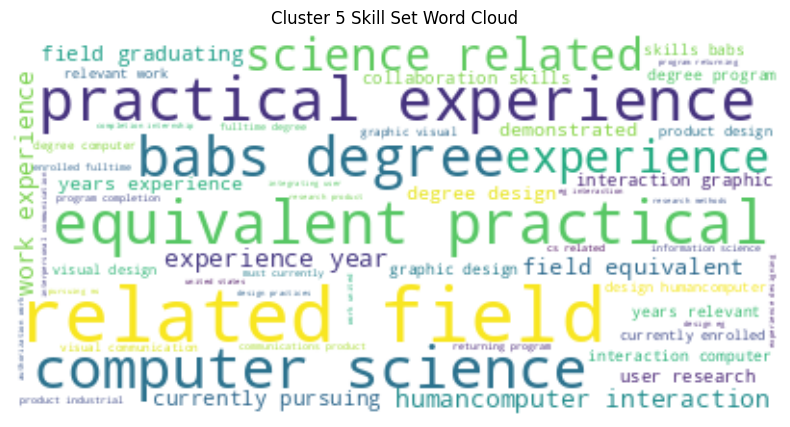

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
from google.colab import files
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

df = pd.read_csv('job_skills.csv')
df.head()

df['combined_qualifications'] = df[['Minimum Qualifications', 'Preferred Qualifications']].fillna('').agg(' '.join, axis=1)


nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_qualifications'] = df['combined_qualifications'].apply(clean_text)

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_qualifications'])


num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['cluster'], cmap='tab10')
plt.title('Skill Clusters from Job Qualifications')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.colorbar(label='Cluster')
plt.show()


for i in range(num_clusters):
    print(f"\nCluster {i} - Sample Job Titles:")
    print(df[df['cluster'] == i]['Title'].head(5).values)

    print(f"\nCluster {i} - Common Skills/Keywords:")
    text = " ".join(df[df['cluster'] == i]['cleaned_qualifications'])
    keywords = Counter(text.split()).most_common(10)
    print(keywords)


for i in range(num_clusters):
    text = " ".join(df[df['cluster'] == i]['cleaned_qualifications'])
    wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {i} Skill Set Word Cloud")
    plt.show()

df.to_csv("clustered_skills.csv", index=False)
files.download("clustered_skills.csv")


In [ ]:
import pickle

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)


In [ ]:
from collections import Counter

for i in range(num_clusters):
    print(f"\n🔹 Cluster {i}")
    print("Sample Titles:", df[df['cluster'] == i]['Title'].head(3).to_list())
    text = " ".join(df[df['cluster'] == i]['cleaned_qualifications'])
    top_words = Counter(text.split()).most_common(10)
    print("Top Keywords:", top_words)



🔹 Cluster 0
Sample Titles: ['Associate Account Strategist (Czech/Slovak), Global Customer Experience', 'Associate Account Strategist (Ukrainian), GMS Sales', 'Measurement and Attribution Specialist (Northern Europe)']
Top Keywords: [('experience', 645), ('ability', 454), ('skills', 200), ('sales', 188), ('degree', 176), ('management', 174), ('speak', 172), ('english', 169), ('fluently', 169), ('idiomatically', 168)]

🔹 Cluster 1
Sample Titles: ['Supplier Development Engineer (SDE), Cable/Connector', 'Data Analyst, Product and Tools Operations, Google Technical Services', 'Program Manager, Audio Visual (AV) Deployments']
Top Keywords: [('experience', 2619), ('ability', 1023), ('skills', 726), ('degree', 648), ('management', 624), ('years', 601), ('equivalent', 569), ('practical', 519), ('babs', 420), ('work', 407)]

🔹 Cluster 2
Sample Titles: ['Partner Onboarding Manager (Americas)', 'Global Partner Business Development Manager', 'Partner Onboarding Manager (Americas)']
Top Keywords: [